In [1]:
import csv
import re
import pandas as pd

In [2]:
def parse_pair(text):
    text = re.sub(r"\@", "", text)
    pairs = text.split("\t")
    pairs_list = list()
    for pair in pairs:
        pairs_list.append(tuple(pair.split(",")))
    return pairs_list

In [3]:
pairs_list = list()
label_list = list()
with open('train_return_pair.csv', 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    next(csvreader)
    for row in csvreader:
        label_list.append(row[1])
        pairs_list.append(parse_pair(row[2]))

In [4]:
pair_dict = {}
for pairs in pairs_list:
    for pair in pairs:
        if len(pair) == 3:
            pair_tuple = (pair[0], pair[1])
            if pair_tuple not in pair_dict:
                pair_dict[pair_tuple] = 1
            else:
                pair_dict[pair_tuple] = pair_dict[pair_tuple] + 1

In [5]:
sa_pair_dict = {}
ns_pair_dict = {}
for i in range(len(pairs_list)):
    if label_list[i] == "1":
        for pair in pairs_list[i]:
            if len(pair) == 3:
                pair_tuple = (pair[0], pair[1])
                if pair_tuple not in sa_pair_dict:
                    sa_pair_dict[pair_tuple] = 1
                else:
                    sa_pair_dict[pair_tuple] = sa_pair_dict[pair_tuple] + 1
    else:
        for pair in pairs_list[i]:
            if len(pair) == 3:
                pair_tuple = (pair[0], pair[1])
                if pair_tuple not in ns_pair_dict:
                    ns_pair_dict[pair_tuple] = 1
                else:
                    ns_pair_dict[pair_tuple] = ns_pair_dict[pair_tuple] + 1

In [6]:
import operator
sorted_sa = sorted(sa_pair_dict.items(), key=operator.itemgetter(1))
sorted_ns = sorted(ns_pair_dict.items(), key=operator.itemgetter(1))

In [7]:
sa_pair_sum_dict = {}
ns_pair_sum_dict = {}
for i in range(len(pairs_list)):
    if label_list[i] == "1":
        for pair in pairs_list[i]:
            if len(pair) == 3:
                pair_tuple = (pair[0], pair[1])
                if pair_tuple not in sa_pair_sum_dict:
                    sa_pair_sum_dict[pair_tuple] = float(pair[2])
                else:
                    sa_pair_sum_dict[pair_tuple] = sa_pair_sum_dict[pair_tuple] + float(pair[2])
    else:
        for pair in pairs_list[i]:
            if len(pair) == 3:
                pair_tuple = (pair[0], pair[1])
                if pair_tuple not in ns_pair_sum_dict:
                    ns_pair_sum_dict[pair_tuple] = float(pair[2])
                else:
                    ns_pair_sum_dict[pair_tuple] = ns_pair_sum_dict[pair_tuple] + float(pair[2])

In [8]:
def print_pair_diff(pair_tuple):
    print(pair_tuple)
    print(sa_pair_sum_dict[pair_tuple] / sa_pair_dict[pair_tuple])
    print(ns_pair_sum_dict[pair_tuple] / ns_pair_dict[pair_tuple])

In [9]:
print_pair_diff(('NP', 'VP'))
print_pair_diff(('IN', 'NP'))
print_pair_diff(('NP', 'S'))
print_pair_diff(('DT', 'NN'))
print_pair_diff(('NP', 'PP'))

('NP', 'VP')
2.240354308913088
2.171295484854257
('IN', 'NP')
0.934241253487881
0.8921059268600275
('NP', 'S')
3.3991421291053214
3.141895386423751
('DT', 'NN')
0.9458671742808836
0.7395693779904304
('NP', 'PP')
1.5384819387288537
1.4214528985507275


In [26]:
def get_means(pairs_list):
    sa_list = []
    ns_list = []
    name_list = []
    for pair in pairs_list:
        sa_list.append(float(sa_pair_sum_dict[pair] / sa_pair_dict[pair]))
        ns_list.append(float(ns_pair_sum_dict[pair] / ns_pair_dict[pair]))
        name_list.append("(" + pair[0] + "," + pair[1] + ")")
    return (sa_list, ns_list, name_list)


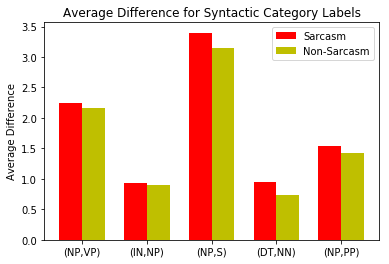

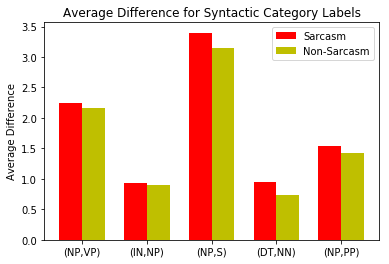

In [37]:
import numpy as np
import matplotlib.pyplot as plt

pairs_list = [('NP', 'VP'), ('IN', 'NP'), ('NP', 'S'), ('DT', 'NN'), ('NP', 'PP')]
sa_list, ns_list, name_list = get_means(pairs_list)

N = 5

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, sa_list, width, color='r')

rects2 = ax.bar(ind + width, ns_list, width, color='y')

# add some text for labels, title and axes ticks
ax.set_ylabel('Average Difference')
ax.set_title('Average Difference for Syntactic Category Labels')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(name_list)

ax.legend((rects1[0], rects2[0]), ('Sarcasm', 'Non-Sarcasm'))


plt.show()
#plt.savefig('books_read.png')